## Observations and Insights 

The top 2 drugs were administered more times than the rest. Could the results change if they were administered the same number of times?

Out of the top four drug regimen used Ramicane and Capomulin offered the best results by a large margin.
Ramicane     45.220869
Capomulin    47.685963
Ceftamin     68.923185
Infubinol    72.226731

The correlation between average tumor size and mouse weight is trending upwards and exehibits a close correlation of 0.84. As mouse weight goes up, so to does the tumor size. See table at bottom of notebook for reference.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
dirty_Mouse_Rat_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")
dirty_Mouse_Rat_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
dirty_Mouse_Rat_df['Mouse ID'].count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
sort_study_df = study_results.groupby(['Mouse ID', 'Timepoint'])
sort_study_df.max().head(20)

Tumor Volume (mm3)  Metastatic Sites
Mouse ID Timepoint                                      
a203     0                   45.000000                 0
         5                   48.508468                 0
         10                  51.852437                 1
         15                  52.777870                 1
         20                  55.173336                 1
         25                  56.793208                 1
         30                  59.523197                 1
         35                  61.931650                 2
         40                  63.593490                 2
         45                  67.973419                 2
a251     0                   45.000000                 0
         5                   46.982127                 0
         10                  48.591179                 1
         15                  50.534456                 1
         20                  54.462594                 1
         25                  57.414646                 1
         30                  59.861241                 1
         35                  60.903885                 1
         40                  63.095076                 1
         45                  65.525743                 1

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_Mouse_Rat = dirty_Mouse_Rat_df.drop_duplicates(['Mouse ID'], keep='last')
clean_Mouse_Rat

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_Mouse_Rat['Mouse ID'].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
dR_group = clean_Mouse_Rat.groupby(['Drug Regimen'])
tumor_size = dR_group['Tumor Volume (mm3)']

tumor_size_mean = dR_group.mean()['Tumor Volume (mm3)']
tumor_size_median = dR_group.median()['Tumor Volume (mm3)']
tumor_size_var =  clean_Mouse_Rat.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_size_std = clean_Mouse_Rat.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_size_SEM = clean_Mouse_Rat.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']


# This method is the most straightforward, creating multiple series and putting them all together at the end.
reg_Analysis_df = pd.DataFrame({'Tumor Size (Mean)':tumor_size_mean,'Average Tumor Size':tumor_size_median,
                                'Tumor Size Variance':tumor_size_var, 'Tumor Size Deviation (std)':tumor_size_std,
                                'Tumor Size Deviation Error (SEM)':tumor_size_SEM})

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reg_Analysis_df

,Tumor Size (Mean),Average Tumor Size,Tumor Size Variance,Tumor Size Deviation (std),Tumor Size Deviation Error (SEM)
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar Plots

In [8]:
dirty_Mouse_Rat_df['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

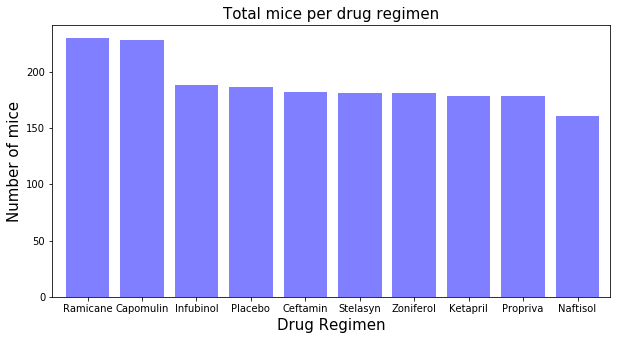

In [9]:
drugs = dirty_Mouse_Rat_df['Drug Regimen'].unique()
mice = dirty_Mouse_Rat_df['Drug Regimen'].value_counts()

x_axisDr = np.arange(len(drugs))
tick_locations = [value+0.4 for value in x_axisDr]

plt.figure(figsize=(10,5))
plt.bar(x_axisDr, mice, color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, drugs)

plt.xlim(-0.25, len(x_axisDr))

plt.title("Total mice per drug regimen",fontsize=15)
plt.xlabel("Drug Regimen",fontsize=15)
plt.ylabel("Number of mice",fontsize=15)


plt.show()

## Pie Plots

In [10]:
clean_Mouse_Rat['Sex'].value_counts()

Male      125
Female    124
Name: Sex, dtype: int64

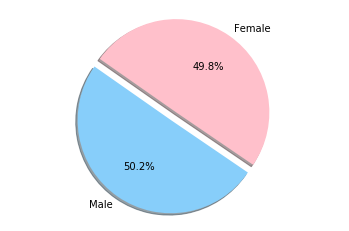

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
counts = [125,124]

colors = ['lightskyblue','pink']
plt.pie(counts, explode=(0,0.1), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

top_Four = dR_group.max()['Tumor Volume (mm3)'].sort_values(ascending=True).head(4)
top_Four

Drug Regimen
Ramicane     45.220869
Capomulin    47.685963
Ceftamin     68.923185
Infubinol    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [13]:
quartiles = top_Four.quantile([0.25,0.5,0.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile for drug regimen effectiveness is: {lowerq}")
print(f"The upper quartile for drug regimen effectiveness is: {upperq}")
print(f"The interquartile range for drug regimen effectiveness is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print('Based on resulting data, the results do not include any outliers')

The lower quartile for drug regimen effectiveness is: 47.069689492500004
The upper quartile for drug regimen effectiveness is: 69.74907115250001
The interquartile range for drug regimen effectiveness is: 22.679381660000004
Values below 13.050617002499997 could be outliers.
Values above 103.76814364250001 could be outliers.
Based on resulting data, the results do not include any outliers


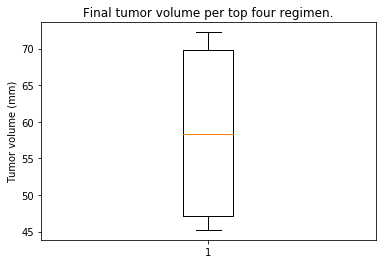

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume per top four regimen.')
ax1.set_ylabel('Tumor volume (mm)')
ax1.boxplot(top_Four)
plt.show()

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mask = dirty_Mouse_Rat_df['Mouse ID'] == "s185"
s185_df = dirty_Mouse_Rat_df.loc[mask]

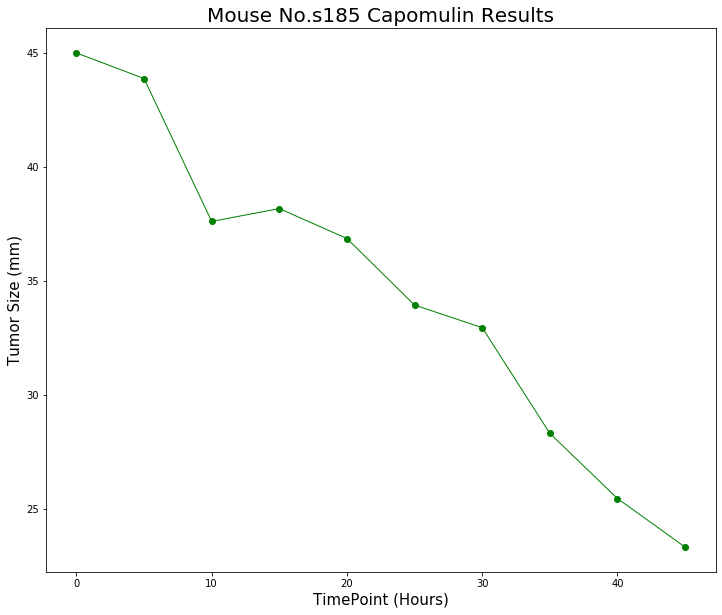

In [16]:
x_axis = s185_df['Timepoint']
y_axis = s185_df['Tumor Volume (mm3)']

plt.figure(figsize=(12,10))
plt.xlabel("TimePoint (Hours)",fontsize=15)
plt.ylabel("Tumor Size (mm)",fontsize=15)
plt.title("Mouse No.s185 Capomulin Results",fontsize=20)
plt.plot(x_axis,y_axis , marker="o", color="green", linewidth=1)

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
maskCap = dirty_Mouse_Rat_df['Drug Regimen'] == "Capomulin"
capo_df = dirty_Mouse_Rat_df.loc[maskCap]


tumorVol = capo_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
weightMouse = capo_df.groupby(['Mouse ID']).max()['Weight (g)']


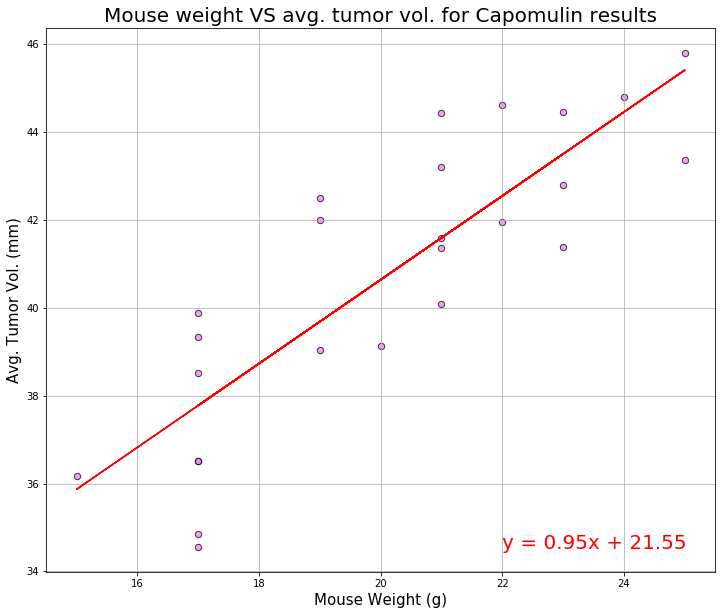

In [18]:
(slope, intercept, r_value, p_value, std_err) = linregress(weightMouse, tumorVol)
regress_values = weightMouse * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12,10))
plt.scatter(weightMouse,tumorVol,marker="o", facecolors="violet", edgecolors="black",s=40,
             alpha=0.75)
plt.plot(weightMouse,regress_values,"r-")
plt.annotate(line_eq,(22,34.5),fontsize=20,color="red")

plt.xlabel("Mouse Weight (g)",fontsize=15)
plt.ylabel("Avg. Tumor Vol. (mm)",fontsize=15)
plt.title("Mouse weight VS avg. tumor vol. for Capomulin results",fontsize=20)
plt.grid(True)

plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weightMouse,tumorVol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
